# 

Pymaceuticals Inc.
---

Analysis

- Based on the data, Capomulin and 
Ramicanehave the better results. The younger males also seem to have the better results overall. The tumor also Metastatic at a much higher rate in females. Finally, the mice that weigh more tern to have a higher tumor volume.
I

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = mouse_data_df['Mouse ID'].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
dups_MouseID = mouse_data_df[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_MouseID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df[mouse_data_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID']!='g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol = clean_mouse_df.groupby(['Drug Regimen'])

tumor_vol_mean = tumor_vol['Tumor Volume (mm3)'].mean()
tumor_vol_med = tumor_vol['Tumor Volume (mm3)'].median()
tumor_vol_var = tumor_vol['Tumor Volume (mm3)'].var()
tumor_vol_std = tumor_vol['Tumor Volume (mm3)'].std()
tumor_vol_sem = tumor_vol['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_vol_mean,
                        "Median" : tumor_vol_med,
                        "Variance" : tumor_vol_var,
                        "Standard Deviation" : tumor_vol_std,
                        "SEM" : tumor_vol_sem
                        })
tumor_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_adv = clean_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_vol_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
bar = clean_mouse_df["Drug Regimen"].value_counts()
bar

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

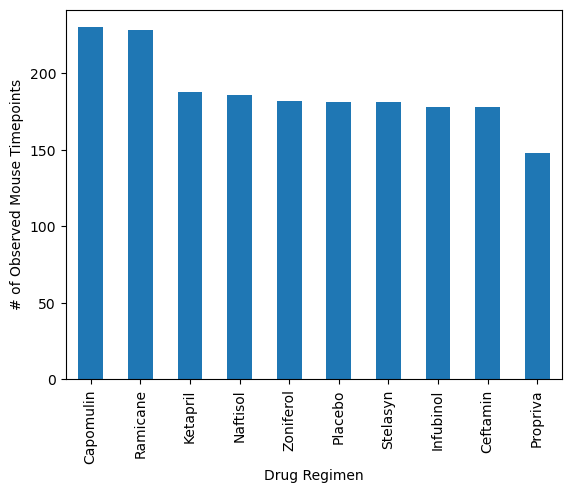

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar.plot(x='Drug Regimen', kind='bar', legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

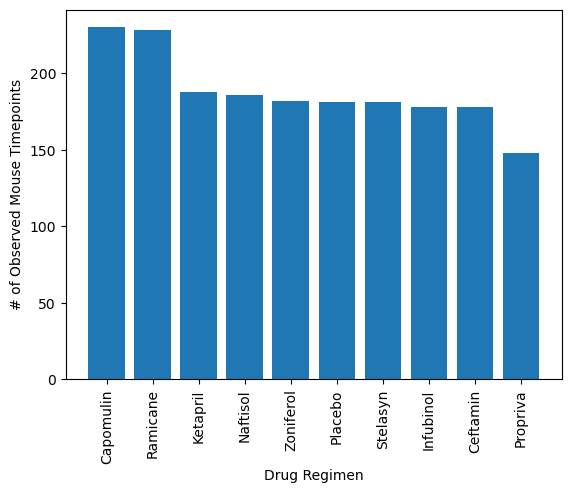

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar.index, bar.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [13]:
gender_distribution = clean_mouse_df["Sex"].value_counts()
gender_distribution

Sex
Male      958
Female    922
Name: count, dtype: int64

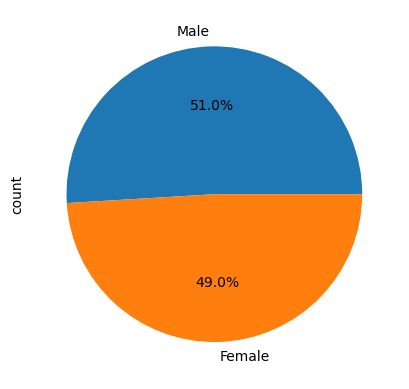

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution.plot(y=gender_distribution.values, kind='pie',  autopct='%1.1f%%', legend=False)
plt.show()

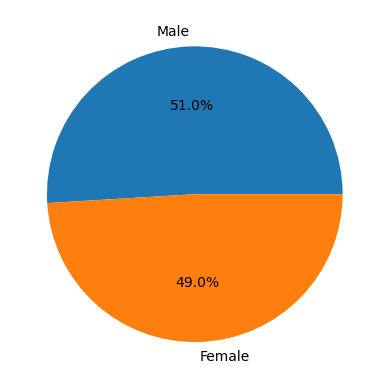

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_max = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_max_df = pd.DataFrame(last_timepoint_max)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df= pd.merge(clean_mouse_df, last_timepoint_max_df, how="right", on=['Mouse ID', 'Timepoint'])
max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset 
    treatments_tumor_vol.append(final_tumor_vol)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lower_qs = quartiles[0.25]
    upper_qs = quartiles[0.75]
    iqr = upper_qs - lower_qs
    lower_bound = lower_qs - (1.5 * iqr)
    upper_bound = upper_qs + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment} IQR: {iqr}, Outliers: {outliers}")


Capomulin IQR: 7.781863460000004, Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR: 9.098536719999998, Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR: 11.477135160000003, Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR: 15.577752179999997, Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


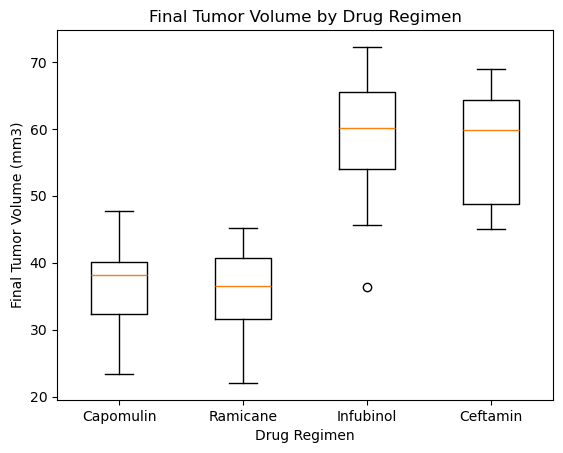

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatments_tumor_vol, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Drug Regimen')
plt.show()


## Line and Scatter Plots

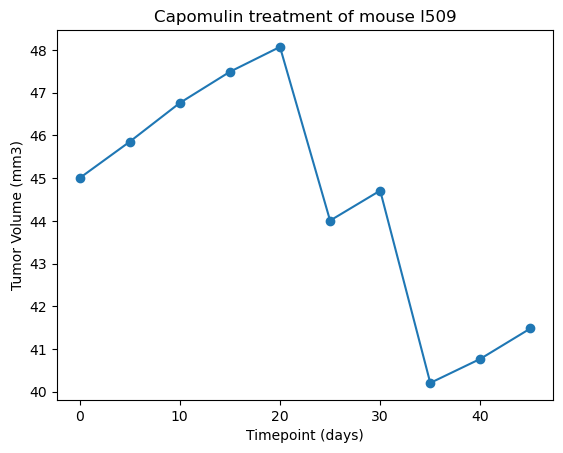

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509'] # Example mouse ID
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


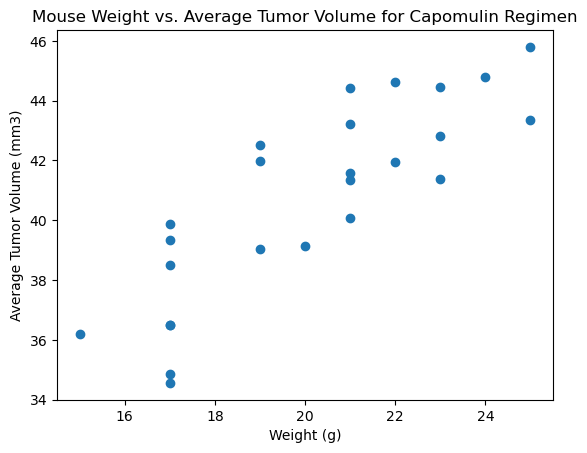

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_avg = capomulin_data.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


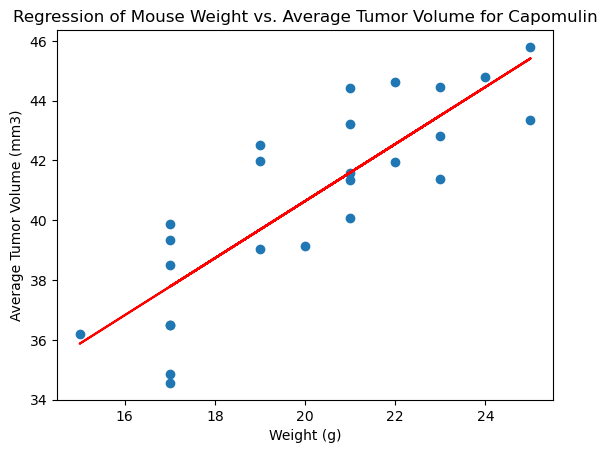

In [66]:
# Calculate the correlation coefficient and a linear regression model 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Regression of Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()